In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.groupby('isFlaggedFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,,,,
0,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604
1,16,16,16,16,16,16,16,16,16,16


In [5]:
df.groupby('type').count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
CASH_IN,1399284,1399284,1399284,1399284,1399284,1399284,1399284,1399284,1399284,1399284
CASH_OUT,2237500,2237500,2237500,2237500,2237500,2237500,2237500,2237500,2237500,2237500
DEBIT,41432,41432,41432,41432,41432,41432,41432,41432,41432,41432
PAYMENT,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495
TRANSFER,532909,532909,532909,532909,532909,532909,532909,532909,532909,532909


In [6]:
df.pivot_table(values='amount', index='type', columns='isFraud', aggfunc='count')

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [8]:
dataFiltered =df[df.type.isin(['CASH_OUT', 'TRANFER'])]
dataFiltered.pivot_table(values='amount', index='type', columns='isFraud', aggfunc='count')

isFraud,0,1
type,,
CASH_OUT,2233384,4116


In [9]:
ec= LabelEncoder()

In [11]:
dataFiltered['typeEncoded'] = ec.fit_transform(dataFiltered['type'])
dataFiltered.pivot_table(values='amount', index='typeEncoded', columns='isFraud', aggfunc='count')

C:\Users\\AppData\Local\Temp\ipykernel_12040\811468419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFiltered['typeEncoded'] = ec.fit_transform(dataFiltered['type'])


isFraud,0,1
typeEncoded,,
0,2233384,4116


In [12]:
df1 = dataFiltered.drop(['step', 'type', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [14]:
df1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
3,181.00,181.00,0.0,21182.0,0.00,1,0
15,229133.94,15325.00,0.0,5083.0,51513.44,0,0
42,110414.71,26845.41,0.0,288800.0,2415.16,0,0
47,56953.90,1942.02,0.0,70253.0,64106.18,0,0
48,5346.89,0.00,0.0,652637.0,6453430.91,0,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237500 entries, 3 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   typeEncoded     int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 128.0 MB


In [16]:
df1.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
count,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2237500.0
mean,1.762740e+05,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06,1.839553e-03,0.0
std,1.753297e+05,1.791326e+05,1.091940e+05,3.633876e+06,3.663008e+06,4.285055e-02,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,7.266965e+04,0.000000e+00,0.000000e+00,1.146859e+05,2.858970e+05,0.000000e+00,0.0
50%,1.470722e+05,5.560000e+02,0.000000e+00,4.880985e+05,6.876067e+05,0.000000e+00,0.0
75%,2.465395e+05,3.144624e+04,0.000000e+00,1.510450e+06,1.741879e+06,0.000000e+00,0.0
max,1.000000e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['isFraud'],axis=1),df1.isFraud,test_size=0.2,random_state=False)

In [18]:
LR = LogisticRegression()

In [19]:
LR.fit(X_train,y_train)

LogisticRegression()

In [20]:
pred = LR.predict(X_test)

In [21]:
LR.score(X_test,y_test)

0.999477094972067

In [22]:
cm = confusion_matrix(y_test,pred)

In [23]:
cm

array([[446548,    100],
       [   134,    718]], dtype=int64)

Text(33.0, 0.5, 'Actuals')

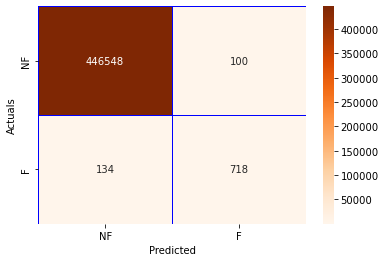

In [26]:
sns.heatmap(cm, annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Blue')
plt.xticks(np.arange(2)+.5,['NF', 'F'])
plt.yticks(np.arange(2)+.5,['NF', 'F'])
plt.xlabel("Predicted")
plt.ylabel("Actuals")

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    446648
           1       0.88      0.84      0.86       852

    accuracy                           1.00    447500
   macro avg       0.94      0.92      0.93    447500
weighted avg       1.00      1.00      1.00    447500



In [28]:
dModel = DecisionTreeClassifier()

In [29]:
dModel.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
DP = dModel.predict(X_test)

In [32]:
cm = confusion_matrix(y_test,DP)

Text(33.0, 0.5, 'Actuals')

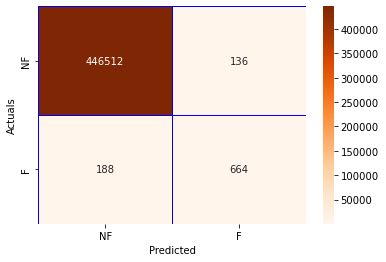

In [33]:
sns.heatmap(cm, annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Blue')
plt.xticks(np.arange(2)+.5,['NF', 'F'])
plt.yticks(np.arange(2)+.5,['NF', 'F'])
plt.xlabel("Predicted")
plt.ylabel("Actuals")

In [34]:
print(classification_report(y_test,DP))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    446648
           1       0.83      0.78      0.80       852

    accuracy                           1.00    447500
   macro avg       0.91      0.89      0.90    447500
weighted avg       1.00      1.00      1.00    447500

